# Correlación 

Correlación no implica causalidad

In [1]:
import pandas as pd

In [2]:
data_ads=pd.read_csv("../datasets/ads/Advertising.csv")

In [3]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
len(data_ads)

200

In [5]:
import numpy as np

In [7]:
data_ads["corrn"]=(data_ads["TV"]-np.mean(data_ads["TV"]))*(data_ads["Sales"]-np.mean(data_ads["Sales"]))

In [8]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [9]:
#correlación con respecto a la TV
data_ads["corr1"]=(data_ads["TV"]-np.mean(data_ads["TV"]))**2

In [10]:
#correlación con respecto a la venta
data_ads["corr2"]=(data_ads["Sales"]-np.mean(data_ads["Sales"]))**2

In [11]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [12]:
#calcular todos los coeficientes 
corr_pearson=sum(data_ads["corrn"])/np.sqrt(sum(data_ads["corr1"])*sum(data_ads["corr2"]))

In [14]:
corr_pearson

0.782224424861606

El valor de la correlación positivo y orden creciente, entre más se gasta en televisión, hay más ventas. La correlación es positiva. 

In [17]:
def corr_coeff(df,var1,var2):
    df["corrn"]=(df[var1]-np.mean(df[var1]))*(df[var2]-np.mean(df[var2]))
    df["corr1"]=(df[var1]-np.mean(df[var1]))**2
    df["corr2"]=(df[var2]-np.mean(df[var2]))**2
    corr_pearson=sum(df["corrn"])/np.sqrt(sum(df["corr1"])*sum(df["corr2"]))
    return corr_pearson

In [18]:
corr_coeff(data_ads, "TV", "Sales")

0.782224424861606

In [20]:
cols=data_ads.columns.values
cols

array(['TV', 'Radio', 'Newspaper', 'Sales', 'corrn', 'corr1', 'corr2'],
      dtype=object)

In [21]:
for x in cols:
    for y in cols: 
        print(x+ ", "+ y + ": "+ str(corr_coeff(data_ads, x, y)))

TV, TV: 1.0
TV, Radio: 0.05480866446583009
TV, Newspaper: 0.056647874965056993
TV, Sales: 0.782224424861606
TV, corrn: -0.0011216033233262073
TV, corr1: -0.07879735036509569
TV, corr2: -0.04435683271077501
Radio, TV: 0.05480866446583009
Radio, Radio: 1.0
Radio, Newspaper: 0.3541037507611752
Radio, Sales: 0.5762225745710553
Radio, corrn: 0.003367194224496663
Radio, corr1: 0.1085768694522202
Radio, corr2: 0.28933391270094067
Newspaper, TV: 0.056647874965056993
Newspaper, Radio: 0.3541037507611752
Newspaper, Newspaper: 1.0
Newspaper, Sales: 0.22829902637616525
Newspaper, corrn: 0.004654495262249754
Newspaper, corr1: 0.5503385875778577
Newspaper, corr2: 0.45100034081887913
Sales, TV: 0.782224424861606
Sales, Radio: 0.5762225745710553
Sales, Newspaper: 0.22829902637616525
Sales, Sales: 1.0
Sales, corrn: 0.03435823617756815
Sales, corr1: 0.3226857579432848
Sales, corr2: 0.3391108854965276
corrn, TV: 0.002251660616088983
corrn, Radio: 0.013091062391317217
corrn, Newspaper: 0.00300164508896656

In [22]:
#La correlación es simétrica. 

In [23]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'Gasto en TV vs Ventas del Producto')

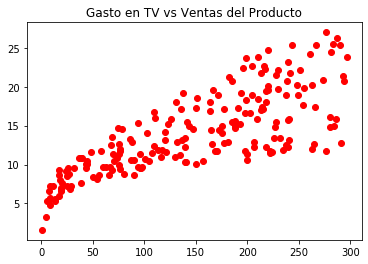

In [26]:
plt.plot(data_ads["TV"],data_ads["Sales"], "ro")
plt.title("Gasto en TV vs Ventas del Producto")

Text(0.5, 1.0, 'Gasto en Radio vs Ventas del Producto')

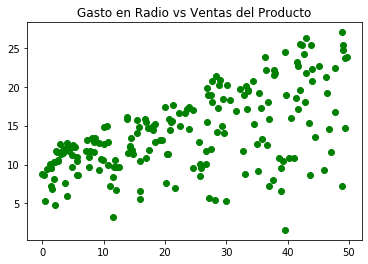

In [32]:
plt.plot(data_ads["Radio"],data_ads["Sales"], "go")
plt.title("Gasto en Radio vs Ventas del Producto")

Text(0.5, 1.0, 'Gasto en Radio vs Ventas del Producto')

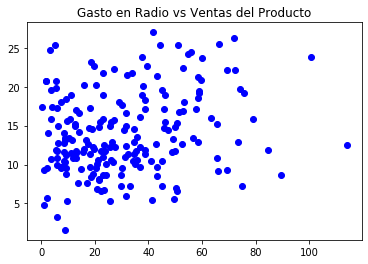

In [31]:
plt.plot(data_ads["Newspaper"],data_ads["Sales"], "bo")
plt.title("Gasto en Radio vs Ventas del Producto")

In [35]:
#tiene que ir esto antes 
data_ads=pd.read_csv("../datasets/ads/Advertising.csv")
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


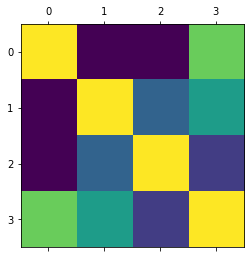

In [36]:
plt.matshow(data_ads.corr())

Los amarillos tienen más correlación.

# Resumen

Contraste de hipótesis para medir nivel de significación, ya puede existir la hipótesis y someterla a análisis, contraste de hipótesis: estadístico de contraste y p-valor. Existe el intervalo unilateral, bilateral. Unilateral izquierda o derecha, bilateral. Cobrará mucha importancia para estimar los coeficientes del modelo y si son importantes. Test de la Chi cuadrado probar que existe una relación de causalidad entre unas variables de entrada y salida, si hay dependencia con relación al género. Finalmente, acabamos con gráficos con matrices de correlación y coeficiente de correlación de Pearson, positiva (si cercano a uno), negativa (a menos uno).